## Phase 4.37

***Time Series: Part I***

# Exploring Time Series Data

## Objectives
- Get an overview of <a href='#intro'>Time Series</a> data.
- Look at types of <a href='#trends'>Trends</a> that can be found in Time Series data.
- Go through <a href='#decomp'>Time Series Decomposition</a>.

<a id='intro'></a>
# Intro to Time Series

## What is  *Time Series Data*?
A series of values of a quantity obtained at successive times, often with **equal intervals** between them.

> - *Housing Market data - median house price / number of homes sold in a given county.*
> - *Temperature of July recorded daily.*
> - *Weekly average price of a stock in the past year.*
> - *Average annual government budget in the past 30 years.*

We will put our focus on *univariate time series*, which records a **single observation**, or variable, at **different but equal time intervals**.

# Characteristics of Time Series Data
- Stationarity *(assumption)*
- Trend
- Seasonality


## Stationarity
- Data is Stationary when its summary statistics (mean, variance, covariance) are not a function of time.
> Mean:
> <img src='./images/mean.webp'>
>
> Variance:
> <img src='./images/variance.webp'>
>
> Covariance:
> <img src='./images/covar.webp'>

### Testing Stationarity
- Examining a visualization.
- Examining the summary statistics.
- Dickey-Fuller Test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-talk')

In [3]:
df = pd.read_csv('./data/shampoo.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [5]:
# String manipulation in lambda function.
df['Month'].apply(lambda x: x[-2:] + '/01/' + '201' + x[0])

0     01/01/2011
1     02/01/2011
2     03/01/2011
3     04/01/2011
4     05/01/2011
5     06/01/2011
6     07/01/2011
7     08/01/2011
8     09/01/2011
9     10/01/2011
10    11/01/2011
11    12/01/2011
12    01/01/2012
13    02/01/2012
14    03/01/2012
15    04/01/2012
16    05/01/2012
17    06/01/2012
18    07/01/2012
19    08/01/2012
20    09/01/2012
21    10/01/2012
22    11/01/2012
23    12/01/2012
24    01/01/2013
25    02/01/2013
26    03/01/2013
27    04/01/2013
28    05/01/2013
29    06/01/2013
30    07/01/2013
31    08/01/2013
32    09/01/2013
33    10/01/2013
34    11/01/2013
35    12/01/2013
Name: Month, dtype: object

In [6]:
# Set 'month' to datetime.
df['Month'] = pd.to_datetime(
    df['Month'].apply(lambda x: x[-2:] + '/01/' + '201' + x[0]))

In [7]:
# Set Month as index.
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
2011-01-01,266.0
2011-02-01,145.9
2011-03-01,183.1
2011-04-01,119.3
2011-05-01,180.3


In [8]:
df.shape

(36, 1)

#### Visualize

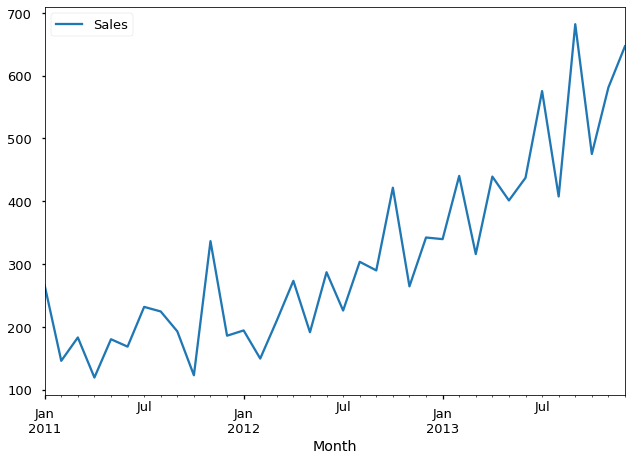

In [9]:
df.plot();

#### Summary Statistics

In [10]:
# Split data in half.
MID = df.shape[0]//2
X0, X1 = df[:MID]['Sales'], df[MID:]['Sales']

# Check stats.
mean0, mean1 = round(X0.mean(), 3), round(X1.mean(), 3)
var0, var1 = round(X0.var(), 3), round(X1.var(), 3)

# Print
print(f'First Half\n\tMean: {mean0}\tVariance: {var0}')
print(f'Second Half\n\tMean: {mean1}\tVariance: {var1}')

First Half
	Mean: 203.506	Variance: 3375.262
Second Half
	Mean: 421.694	Variance: 17090.752


#### Dickey Fuller Test

In [11]:
from statsmodels.tsa.stattools import adfuller

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
adfuller(df['Sales'])

(3.0601420836411797,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.99726442630316)

> ```
> Returns
> -------
> adf : float
>     Test statistic
> pvalue : float
>     MacKinnon's approximate p-value based on MacKinnon (1994, 2010)
> usedlag : int
>     Number of lags used
> nobs : int
>     Number of observations used for the ADF regression and calculation of
>     the critical values
> critical values : dict
>     Critical values for the test statistic at the 1 %, 5 %, and 10 %
>     levels. Based on MacKinnon (2010)
> icbest : float
>     The maximized information criterion if autolag is not None.
> resstore : ResultStore, optional
>     A dummy class with results attached as attributes
```

In [13]:
def adfuller_of(series):
    """Prints the Augmented Dickey-Fuller test results."""
    
    adf, pvalue, usedlag, nobs, crit_vals, resstore = adfuller(series)
    print(f'''
                          ADF: {adf}
                      P-Value: {pvalue}
                     Used Lag: {usedlag}
       Number of Observations: {nobs}
    Critical Values (for ADF): {crit_vals}
                  ResultStore: {resstore}
    ''')

In [14]:
adfuller_of(df['Sales'])


                          ADF: 3.0601420836411797
                      P-Value: 1.0
                     Used Lag: 10
       Number of Observations: 25
    Critical Values (for ADF): {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}
                  ResultStore: 278.99726442630316
    


- The Dickey Fuller Test is a statistical test for testing stationarity. 
- The Null-hypothesis for the test is that the time series is not stationary. 
    - If the test statistic is less than the critical value, we reject the null hypothesis and **say that the series is stationary.**

<a id='trends'></a>
## Trends

### Types
#### No Trend
<img src='./images/no_trend.png'>

#### Linear Trend (Upward / Downward)
<img src='./images/linear_trend.png'>

#### Exponential Trend
<img src='./images/exp_trend.png'>

#### Periodic Trend
<img src='./images/periodic_trend.png'>

### Testing for Trends

#### Rolling Statistics

In [15]:
# Setting rolling window.
ROLL = 3

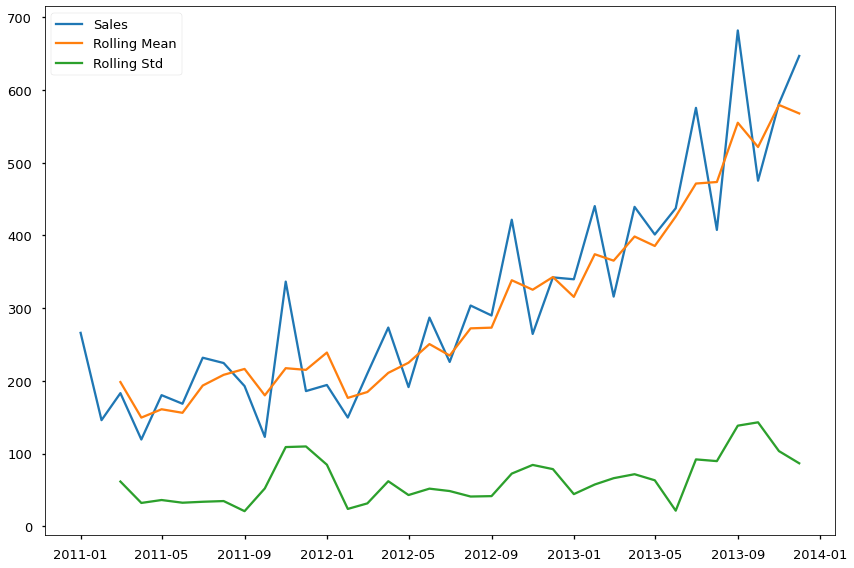

In [16]:
# Creating rolling mean and std.
df['rolling_mean'] = df['Sales'].rolling(window=ROLL).mean()
df['rolling_std'] = df['Sales'].rolling(window=ROLL).std()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df['Sales'], color='tab:blue', label='Sales')
ax.plot(df['rolling_mean'], color='tab:orange', label='Rolling Mean')
ax.plot(df['rolling_std'], color='tab:green', label='Rolling Std')
ax.legend()
fig.tight_layout()

### Removing Trends
Three common methods for removing trends are:
- $\log{x}$ or $\sqrt{x}$ Transformations
- Difference from rolling mean
- Differencing from lag.

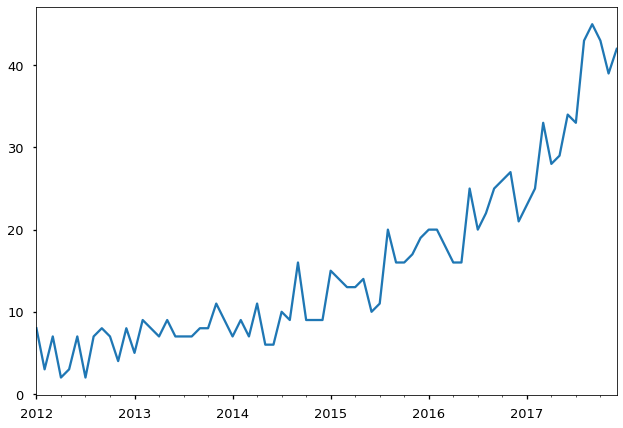

In [17]:
# Generating new data.
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(51)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+6
data = pd.Series(final_series, index=index)
data.plot();

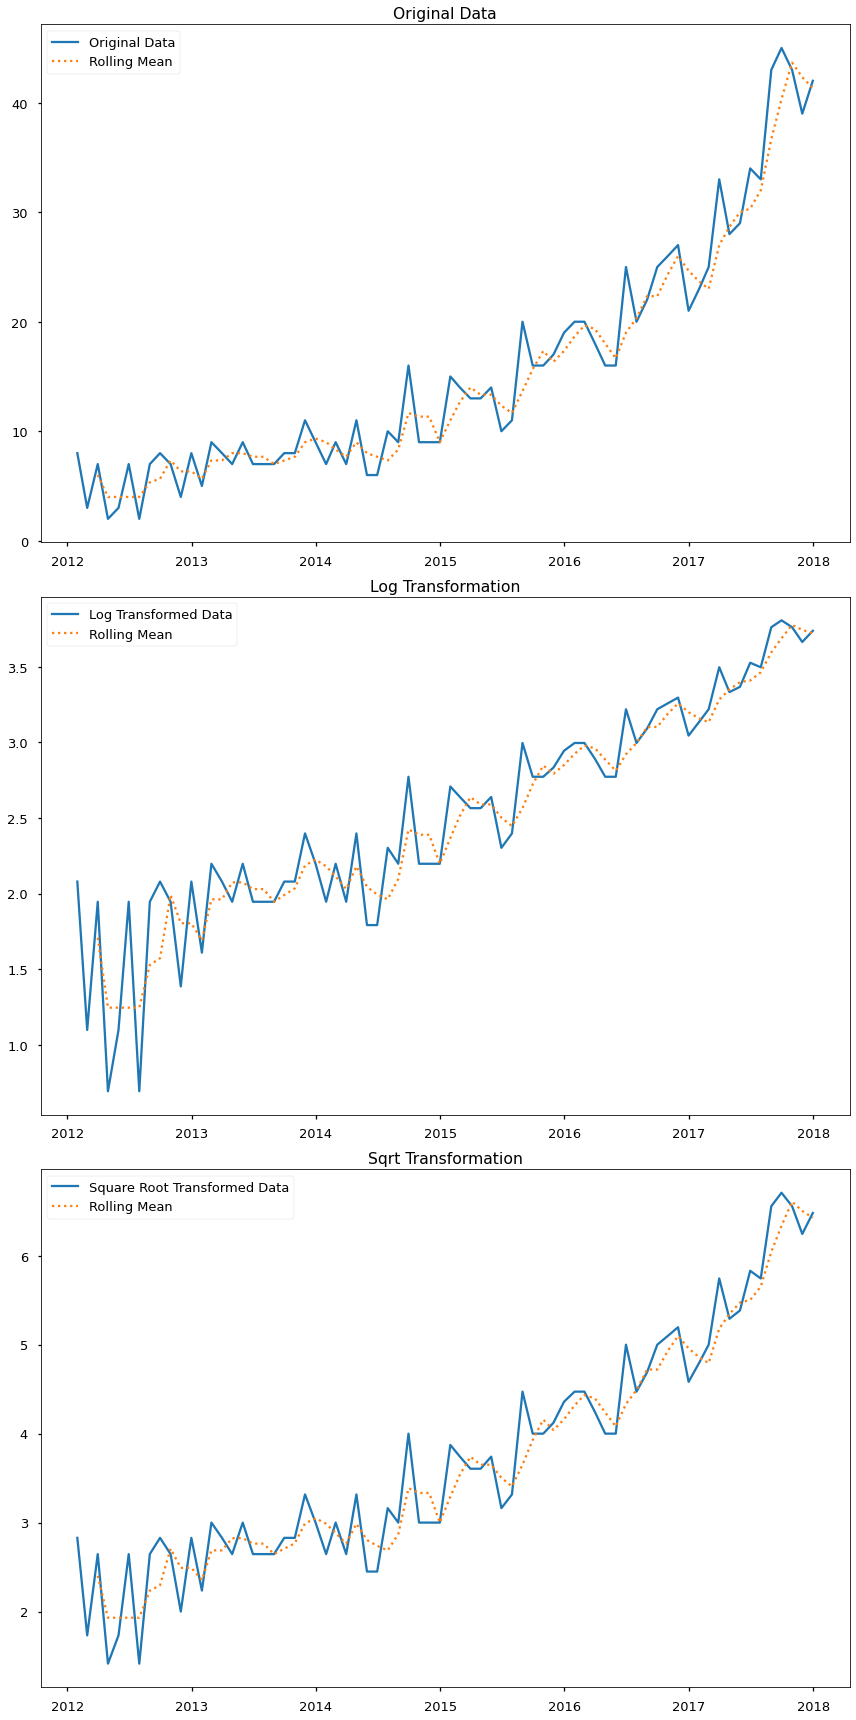

In [18]:
# log/sqrt transformation.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,24))

ax1.plot(data, label='Original Data')
ax1.plot(data.rolling(ROLL).mean(), label='Rolling Mean', ls=':')
ax1.legend()

ax2.plot(np.log(data), label='Log Transformed Data')
ax2.plot(np.log(data).rolling(ROLL).mean(), label='Rolling Mean', ls=':')
ax2.legend()

ax3.plot(np.sqrt(data), label='Square Root Transformed Data')
ax3.plot(np.sqrt(data).rolling(ROLL).mean(), label='Rolling Mean', ls=':')
ax3.legend()

ax1.set(title='Original Data')
ax2.set(title='Log Transformation')
ax3.set(title='Sqrt Transformation')

fig.tight_layout()

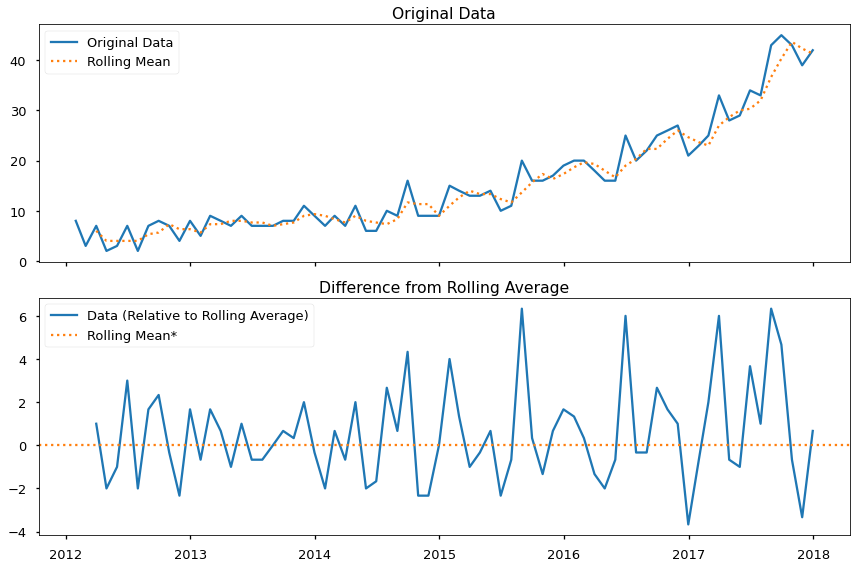

In [19]:
# Differencing the rolling mean.
diff_data = (data - data.rolling(ROLL).mean()).dropna()

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,8))

ax1.plot(data, label='Original Data')
ax1.plot(data.rolling(ROLL).mean(), 
         ls='dotted', 
         color='tab:orange', 
         label='Rolling Mean')

ax2.plot(diff_data, label='Data (Relative to Rolling Average)')
ax2.axhline(ls='dotted', 
            color='tab:orange', 
            label='Rolling Mean*')

ax1.set(title='Original Data')
ax2.set(title='Difference from Rolling Average')

ax1.legend()
ax2.legend()

fig.tight_layout()

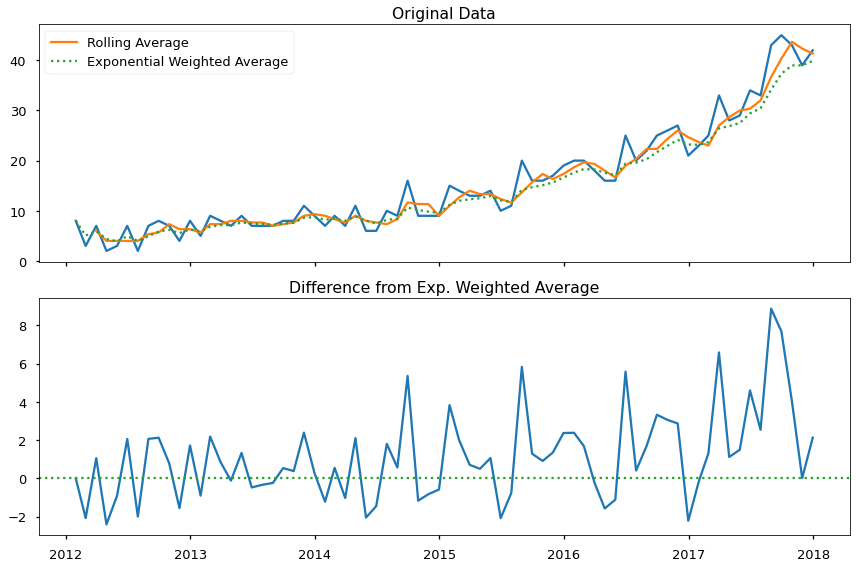

In [20]:
# Differencing with the weighted rolling mean.
exp_roll_mean = data.ewm(halflife=2).mean()

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,8))
ax1.plot(data)
ax1.plot(data.rolling(ROLL).mean(), label='Rolling Average')
ax1.plot(exp_roll_mean, 
         label='Exponential Weighted Average', 
         color='tab:green',
         ls=':')
ax1.set(title='Original Data')
ax1.legend()

ax2.plot(data - exp_roll_mean)
ax2.axhline(color='tab:green',
            label='Exponential Weighted Average*',
            ls=':')
ax2.set(title='Difference from Exp. Weighted Average')
fig.tight_layout()

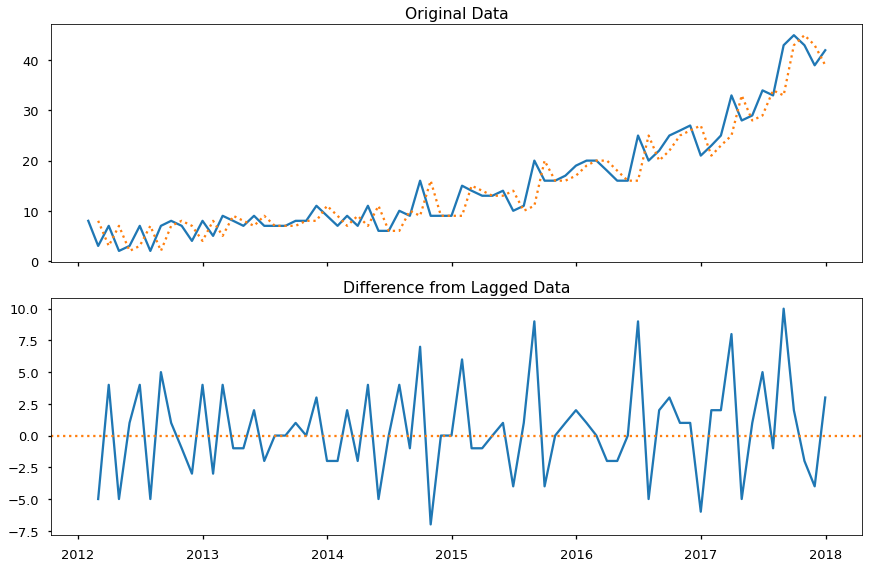

In [21]:
# Differencing.
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax1.plot(data, label='Original Data')
ax1.plot(data.shift(1), ls=':', label='Lagged Data')
ax1.set(title='Original Data')

ax2.plot(data.diff())
ax2.axhline(ls=':', color='tab:orange')
ax2.set(title='Difference from Lagged Data')
fig.tight_layout()

<a id='decomp'></a>
### Decomposition

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
decomposition = seasonal_decompose(data)

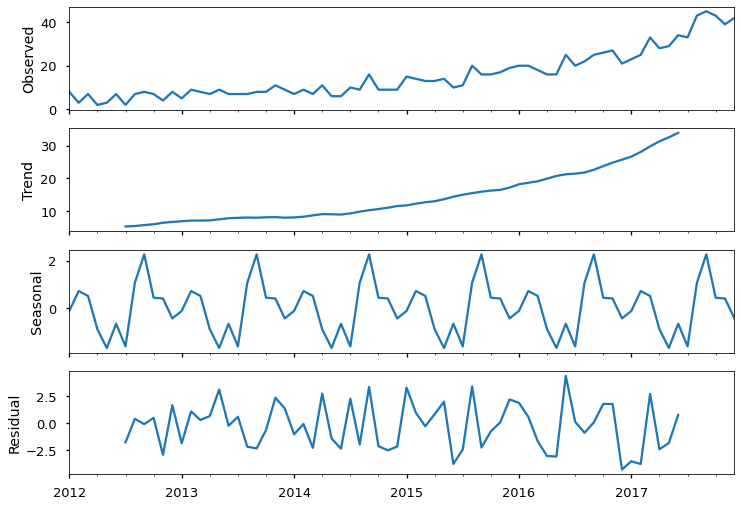

In [24]:
decomposition.plot();

In [25]:
decomposition.nobs

72

In [26]:
decomposition.observed[10:20]

2012-11-30    4
2012-12-31    8
2013-01-31    5
2013-02-28    9
2013-03-31    8
2013-04-30    7
2013-05-31    9
2013-06-30    7
2013-07-31    7
2013-08-31    7
Freq: M, dtype: int64

In [27]:
decomposition.trend[10:20]

2012-11-30    6.500000
2012-12-31    6.750000
2013-01-31    6.958333
2013-02-28    7.166667
2013-03-31    7.166667
2013-04-30    7.208333
2013-05-31    7.541667
2013-06-30    7.875000
2013-07-31    8.000000
2013-08-31    8.083333
Freq: M, dtype: float64

In [28]:
decomposition.seasonal[10:20]

2012-11-30    0.404861
2012-12-31   -0.436806
2013-01-31   -0.120139
2013-02-28    0.721528
2013-03-31    0.513194
2013-04-30   -0.895139
2013-05-31   -1.686806
2013-06-30   -0.661806
2013-07-31   -1.620139
2013-08-31    1.071528
Freq: M, dtype: float64

In [29]:
decomposition.resid[10:20]

2012-11-30   -2.904861
2012-12-31    1.686806
2013-01-31   -1.838194
2013-02-28    1.111806
2013-03-31    0.320139
2013-04-30    0.686806
2013-05-31    3.145139
2013-06-30   -0.213194
2013-07-31    0.620139
2013-08-31   -2.154861
Freq: M, dtype: float64

# Time Series Correlation
***How is my TimeSeries data correlated with itself?***

In [30]:
# Shift data.
pd.concat([data, data.shift(1), data.shift(2)], axis=1).head()

,0,1,2
2012-01-31,8,NaN,NaN
2012-02-29,3,8.0,NaN
2012-03-31,7,3.0,8.0
2012-04-30,2,7.0,3.0
2012-05-31,3,2.0,7.0


<AxesSubplot:>

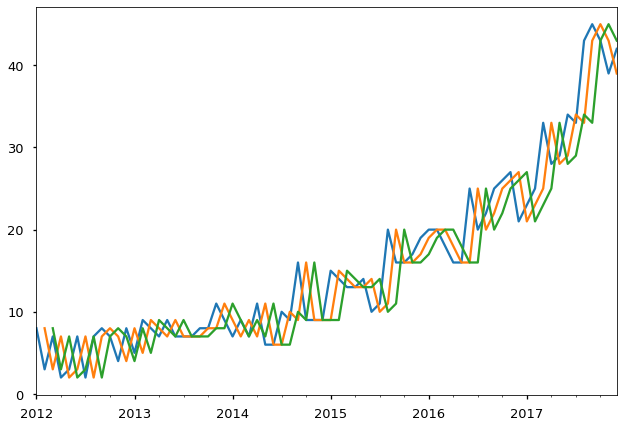

In [31]:
# Plotting
data.plot()
data.shift(1).plot()
data.shift(2).plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Autocorrelation
***The correlation between one time series and the same time series shifted by k periods.***

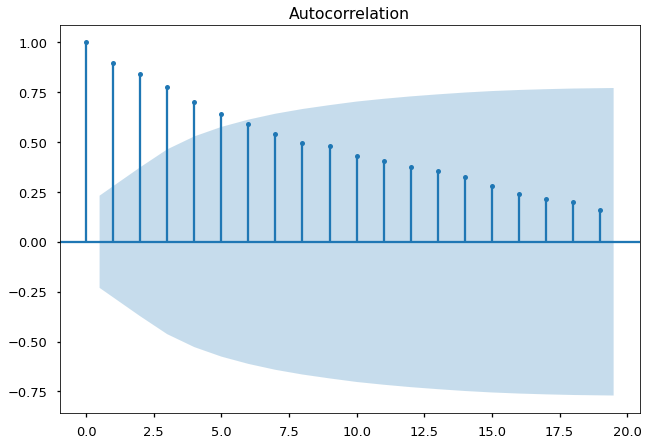

In [33]:
# Plot the autocorrelation function
plot_acf(data);

---
## Partial Autocorrelation
***Partial autocorrelation looks at the correlation between a point and particular lag without the influence of intermediary lags. This helps us see the direct relationship between certain lags.***

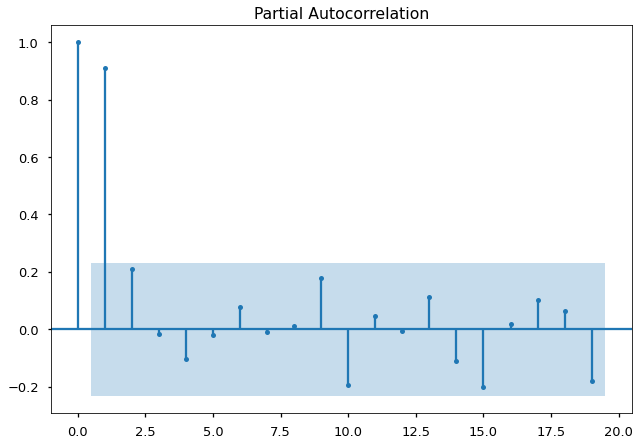

In [34]:
plot_pacf(data);

*Now that we now how to analyze the patterns in our time series we can proceed with creating models to create forecasts!*